In [1]:
from astropy.table import Table
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import itertools
from scipy import misc
from myfunction import *
scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":2, "zorder":0}

%matplotlib inline

In [2]:
filename = '/Users/vaishalp/Dropbox/Final_data/Final_data_upperlimits'
all_data_1 = Table.read(filename, format = 'csv')
all_data = all_data_1[np.where( (all_data_1['LogMs'] >= 10)
                             & (abs(all_data_1['Gal_lat']) > 10) 
                            & (all_data_1['HICAT_confused'] != 1) 
                              &  (all_data_1['W3snr'] > 3.) )]
filename = 'HICAT_sample_v2.csv'
sample = Table.read(filename, format = 'csv')

filename = 'observed.csv'
observed = Table.read(filename, format = 'csv')

filename = '/Users/vaishalp/Dropbox/Office_mac/Desktop/Data/ATLAS3D+NSAmass'
altas = Table.read(filename, format = 'csv')
print(len(all_data['HIPASS']))
print(len(sample['HIPASS']))
print(len(observed['HIPASS']))

1173
91
28


/Users/vaishalp/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/vaishalp/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/vaishalp/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/vaishalp/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/vaishalp/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/vaishalp/anaconda/lib/python3.5/site-packages/numpy/c

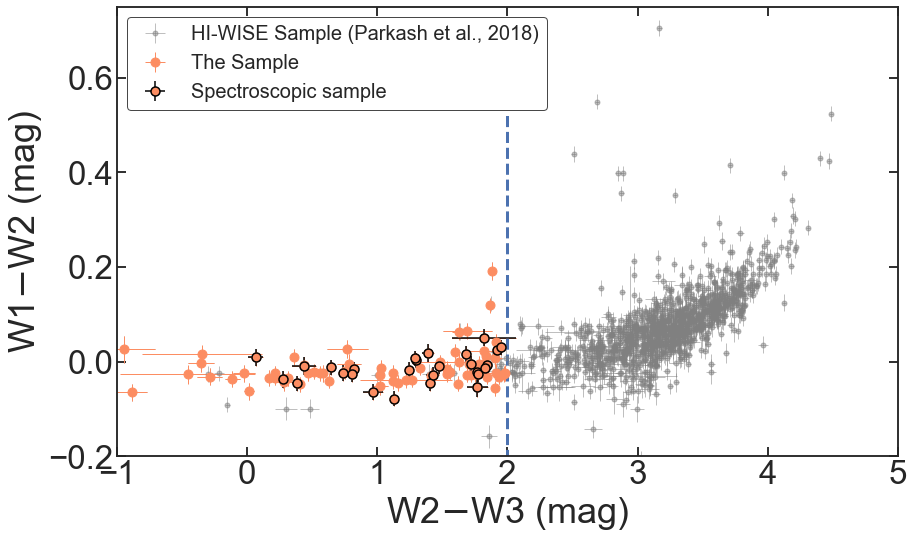

In [3]:
"""
WISE COLOUR-COLOUR PLOT
"""
sns.set_context("talk",font_scale=2.0)
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8})
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(14, 8.27)

myColors = sns.color_palette("Set2", 2)
colors = itertools.cycle(myColors)

x_all = all_data["W2W3_observed"]#all_data['w2best'] - all_data['w3best']
y_all = all_data["W1W2_observed"]#aall_data['w1best'] - all_data['w2best']
x_all_err = all_data["W2W3er_observed"]#all_data['w2best'] - all_data['w3best']
y_all_err = all_data["W1W2er_observed"]#aall_data['w1best'] - all_data['w2best']

plt.errorbar(x_all[np.where(x_all_err < 0.5)], y_all[np.where(x_all_err < 0.5)], 
             yerr=y_all_err[np.where(x_all_err < 0.5)], xerr=x_all_err[np.where(x_all_err < 0.5)],
              fmt='o',c='grey',elinewidth = 1,alpha = 0.5,
             markersize='5', label = "HI-WISE Sample (Parkash et al., 2018)")
#lw = 0, ms = 30, marker = 's', c='grey', alpha = 0.5, \

x = sample["W2W3_observed"]#['w2best'] - sample['w3best']
y = sample["W1W2_observed"]#['w1best'] - sample['w2best']
x_err = sample["W2W3er_observed"]
y_err = sample["W1W2er_observed"]

plt.errorbar(x[np.where(x_err <99)], y[np.where(x_err <99)], 
             yerr=y_err[np.where(x_err <99)], xerr=x_err[np.where(x_err <99)],
              fmt='o', c = myColors[1], elinewidth = 1, alpha = 1,
             label='The Sample') 
# plt.scatter(x, y, lw = 2, s = 30, marker = 'o', \
#             alpha = 0.7, color = myColors[1], label='Our Sample') 

x = observed["W2W3_observed"]#['w2best'] - sample['w3best']
y = observed["W1W2_observed"]#['w1best'] - sample['w2best']
x_err = observed["W2W3er_observed"]
y_err = observed["W1W2er_observed"]
plt.errorbar(x[np.where(x_err <99)], y[np.where(x_err <99)], 
             yerr=y_err[np.where(x_err <99)], xerr=x_err[np.where(x_err <99)],
              fmt='o', c = myColors[1], ecolor='black', 
             markeredgecolor = 'black', markeredgewidth = 1.5,
             elinewidth = 1.5, alpha = 1,
             label='Spectroscopic sample') 

# plt.scatter(x, y, lw = 2, edgecolor='black',s = 30, marker = 'o',\
#             alpha = 0.7, color = myColors[1], label='Spectroscopic sample') 

plt.plot([2,2],[-1.0,0.53], color = 'b', ls = '--', lw = 3)

ax.tick_params(axis='x',top='on')
ax.tick_params(axis='y',right='on')
plt.ylim(-0.2,0.75)
plt.xlim(-1,5)
plt.ylabel('W1$-$W2 (mag)')
plt.xlabel('W2$-$W3 (mag)')

legend = plt.legend(loc = 2,  frameon=True,  fontsize=20,  )
legend.set_zorder(0)
frame = legend.get_frame()
frame.set_edgecolor('k')
frame.set_lw(1)


plt.savefig('w1w2_w2w3.pdf', bbox_inches='tight')

In [4]:
# """
# WISE COLOUR-COLOUR PLOT
# """
# sns.set_context("talk",font_scale=2.0)
# sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8})
# fig, ax = plt.subplots(1, 1)
# fig.set_size_inches(14, 8.27)

# myColors = sns.color_palette("Set1", 5)
# cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

# x_all = all_data['w1best'][np.where( (all_data['W3snr'] > 3.) & (all_data['W2-W3'] >= 2.) )]
# y_all = all_data['specz'][np.where( (all_data['W3snr'] > 3.) & (all_data['W2-W3'] >= 2.) )]

# plt.scatter(x_all, y_all, c = 'gray', lw = 0,s = 15, marker = 'o', 
#             alpha = 0.25, label = "HI-WISE Sample (Parkash et al. 2018)") 

# x = sample['w1best']
# y = sample['specz']
# c2 = sample['w2best'] - sample['w3best']
# plt.scatter(x, y, c = c2, s = 130, marker = 'o', cmap=cmap, vmin = -1.0, vmax = 2.0,\
#                  alpha = 1, label='Our Sample') 

# x = observed['w1best']
# y = observed['specz']
# c2 = observed['w2best'] - observed['w3best']
# sc = plt.scatter(x, y, c = c2, lw = 2, edgecolor='black',s = 130, marker = 'o', cmap=cmap, vmin = -1.0, vmax = 2.0,\
#                  alpha = 1, label='Spectroscopy Data') 
# cbar = plt.colorbar(sc, label = 'W2-W3')

# ax.tick_params(axis='x',top='on')
# ax.tick_params(axis='y',right='on')
# plt.ylim(0,0.04)
# plt.xlim(14.3,4)
# plt.ylabel('z')
# plt.xlabel('app W1 mag')

# legend = plt.legend(loc = 1,  frameon=True,  fontsize=16)
# legend.set_zorder(0)
# frame = legend.get_frame()
# frame.set_edgecolor('k')
# frame.set_lw(1)

# plt.savefig('z_w1_w2w3.pdf', bbox_inches='tight')




In [5]:
def med(bins, x, y, silent=True):
    width = (bins[1] - bins[0])
    x_med = (bins[:-1] + bins[1:]) / 2
    y_med = np.zeros(len(x_med))
    std = np.zeros(len(x_med))
    N_index = np.zeros(len(x_med))
    for i in range(len(x_med)):
        y_med[i] = np.median(( y[np.where( ((x) > bins[i]) & ((x) <= bins[i+1]) ) ] ) )
        std[i] = np.std( (y[np.where( ((x) > bins[i]) & ((x) <= bins[i+1]) ) ] ))
        N_index[i] = len(( y[np.where( ((x) > bins[i]) & ((x) <= bins[i+1]) ) ] ) )                   
        if not silent: print(x_med[i],y_med[i],std[i],N_index[i])
    y_min = y_med - std
    y_max = y_med + std
    y_top = (y_max)- (y_med)
    y_bot = (y_med) - (y_min)
    x_left = (x_med) - (x_med - width/2)
    x_right = (x_med + width/2) - (x_med)    
    return x_med, y_med,x_left, x_right, y_bot, y_top

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/Users/vaishalp/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:688: UserWarning: Warning: 'partition' will ignore the 'mask' of the Mas

10.25 -0.6274323555432277 0.5800803896309973 15.0
10.75 -0.3258575523936218 0.3738566452715769 56.0
11.25 -0.02262920593693021 0.24475860244782677 19.0
10.25 0.11485110902369627 0.32185594096722464 615.0
10.75 0.3166227625670073 0.39397105454273856 442.0
11.25 0.4131188255591345 0.3421688469540573 114.0


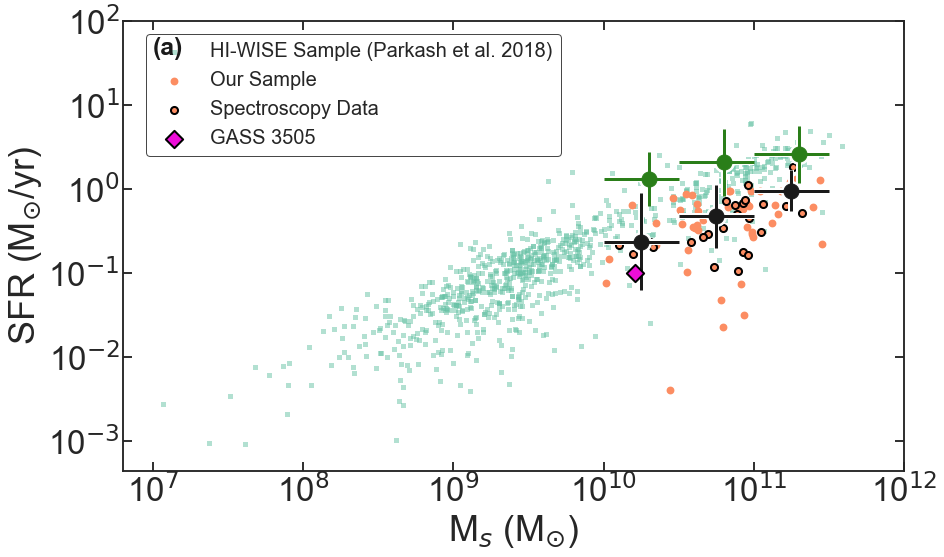

In [6]:
"""
SFR VS MS
"""
sns.set_context("talk",font_scale=2.0)
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8})
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(14, 8.27)

myColors = sns.color_palette("Set2", 2)
colors = itertools.cycle(myColors)

x_all = all_data_1['LogMs'][np.where( (all_data['W3snr'] > 3.) )]
y_all = all_data_1['SFR_3'][np.where( (all_data['W3snr'] > 3.) )]

sc = plt.scatter(x_all, y_all, c = myColors[0], lw = 0,s = 25, 
                 marker = 's', alpha = 0.5,
                 label = "HI-WISE Sample (Parkash et al. 2018)") 

x = sample['LogMs']
y = sample['SFR_3']
plt.scatter(x, y, s = 40, marker = 'o', c = myColors[1],
                 alpha = 1, label='Our Sample') 

x = observed['LogMs']
y = observed['SFR_3']
sc = plt.scatter(x, y, lw = 2, edgecolor='black',s = 50, marker = 'o',
                 c = myColors[1], alpha = 1, label='Spectroscopy Data') 

########## Binning the data according to M_s
bins = np.linspace(10, 11.5, 4)
x_med, y_med,x_left, x_right, y_bot, y_top = med(bins,  sample['LogMs'], sample['SFR_3'], silent=False)

plt.errorbar(x_med, y_med, yerr = (y_bot, y_top), xerr = (x_left, x_right), color='w',fmt='o', \
             ecolor='w', ms = 20, elinewidth=6, label = "") 
plt.errorbar(x_med, y_med, yerr = (y_bot, y_top), xerr = (x_left, x_right), color='k',fmt='o', \
             ecolor='k', ms = 15, elinewidth=3, **scatter_kwargs,label = "")

shift = 0.05
x_med, y_med,x_left, x_right, y_bot, y_top = med(bins, all_data['LogMs'], all_data['SFR_3'], silent=False)
plt.errorbar(x_med+shift, y_med, yerr = (y_bot, y_top), xerr = (x_left+shift, x_right-shift), color='w',fmt='o', \
             ecolor='w', ms = 20, elinewidth=6, label = "") 
plt.errorbar(x_med+shift, y_med, yerr = (y_bot, y_top), xerr = (x_left+shift, x_right-shift), color=sns.xkcd_rgb['tree green'],
             fmt='o', ecolor=sns.xkcd_rgb['tree green'], ms = 15, elinewidth=3, **scatter_kwargs,label = "")

######### GASS 3505
x, y = [10.21], [-1.]
plt.scatter(x, y, s = 150, c = sns.xkcd_rgb['fuchsia'], marker = 'D', lw = 2, edgecolor='black', label = 'GASS 3505', zorder=100)

######### PLOT SETUP
plt.ylabel('SFR (M$_{\odot}$/yr)')
plt.xlabel('M$_{s}$ (M$_{\odot}$)')
ax.tick_params(axis='x',top='on')
ax.tick_params(axis='y',right='on')

plt.ylim([-3.35,2])
plt.xlim(6.8,12)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['','10$^{7}$','10$^{8}$','10$^{9}$','10$^{10}$','10$^{11}$', '10$^{12}$']
ax.set_xticklabels(labels)

labels = [item.get_text() for item in ax.get_yticklabels()]
labels = ['','10$^{-3}$','10$^{-2}$','10$^{-1}$','10$^{0}$', '10$^{1}$','10$^{2}$']
ax.set_yticklabels(labels)

plt.text(7,1.6,"(a)",color= 'k', fontsize=25, fontweight = 'bold')

legend = plt.legend(loc = (0.03,0.7),  frameon=True, prop={'size': 20})
legend.set_zorder(0)
frame = legend.get_frame()
frame.set_edgecolor('k')
frame.set_lw(1)


plt.savefig('SFR_MS.pdf', bbox_inches='tight')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/Users/vaishalp/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:688: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/vaishalp/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:688: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/U

10.25 -0.4895167549923478 0.3847465589897708 15.0
10.75 -1.0261865740042788 0.3961136725760672 56.0
11.25 -1.3367771710504037 0.556308229129327 19.0
10.25 -0.3490450248362844 0.31220316838606726 615.0
10.75 -0.6719373462931735 0.36033711290188886 442.0
11.25 -0.9775730022855287 0.41430424270316574 114.0
['', '', '', '', '', '', '']


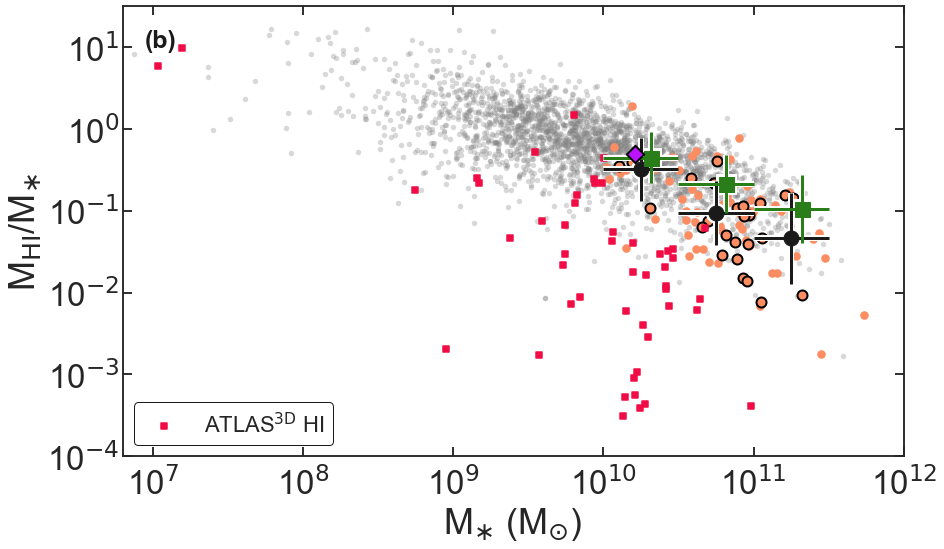

In [39]:
"""
HI fraction Vs Ms 
"""
sns.set_context("talk",font_scale=2.0)
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8})
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(14, 8.27)

myColors = sns.color_palette("Set2", 5)
colors = itertools.cycle(myColors)

y_all = all_data_1['M_HI'][np.where( (all_data_1['W3snr'] > 3.) )]-all_data_1['LogMs'][np.where( (all_data_1['W3snr'] > 3.) )]
x_all = all_data_1['LogMs'][np.where( (all_data_1['W3snr'] > 3.) )]
plt.scatter(x_all, y_all, c = 'grey', lw = 0,s = 30, 
                 marker = 'o', alpha = 0.3, label = '')
#                  label = 'HI-WISE Sample') 

x = sample['LogMs']
y = sample['M_HI'] - sample['LogMs']
plt.scatter(x, y, s = 50, marker = 'o', c = myColors[1],
                 alpha = 1, label = '')
#                  label='Parkash et al. Sample') 

x = observed['LogMs']
y = observed['M_HI'] - observed['LogMs']
sc = plt.scatter(x, y, lw = 2, edgecolor='black',s = 100, marker = 'o',
                 c = myColors[1], alpha = 1, label = '')
#                   label='Parkash et al. WiFeS') 

# x = observed['LogMs'][np.where(observed['HIPASS'] == 'HIPASSJ0330-33')]
# y = observed['M_HI'][np.where(observed['HIPASS'] == 'HIPASSJ0330-33')] #-\
#observed['LogMs'][np.where(observed['HIPASS'] == 'HIPASSJ0330-33')]
# sc = plt.scatter(x, y, lw =2, edgecolor='black',s = 550, marker = '*',
#                  c = myColors[0], alpha = 1, label='ATCA archival ') 

# x = observed['LogMs'][np.where(observed['HIPASS'] == 'HIPASSJ1342-48b')]
# y = observed['M_HI'][np.where(observed['HIPASS'] == 'HIPASSJ1342-48b')] #-\
# sc = plt.scatter(x, y, lw =2, edgecolor='black',s = 550, marker = '*',
#                  c = myColors[0], alpha = 1, label='') 

# x = observed['LogMs'][np.where(observed['HIPASS'] == 'HIPASSJ1301-35')]
# y = observed['M_HI'][np.where(observed['HIPASS'] == 'HIPASSJ1301-35')] #-\
# sc = plt.scatter(x, y, lw =2, edgecolor='black',s = 550, marker = '*',
#                  c = myColors[0], alpha = 1, label='') 

# x = observed['LogMs'][np.where(observed['HIPASS'] == 'HIPASSJ1932-55')]
# y = observed['M_HI'][np.where(observed['HIPASS'] == 'HIPASSJ1932-55')] #-\
# sc = plt.scatter(x, y, lw =2, edgecolor='black',s = 550, marker = '*',
#                  c = myColors[0], alpha = 1, label='') 

# x = observed['LogMs'][np.where(observed['HIPASS'] == 'HIPASSJ1945-54')]
# y = observed['M_HI'][np.where(observed['HIPASS'] == 'HIPASSJ1945-54')] #-\
# sc = plt.scatter(x, y, lw =2, edgecolor='black',s = 550, marker = '*',
#                  c = myColors[0], alpha = 1, label='') 

# x = observed['LogMs'][np.where(observed['HIPASS'] == 'HIPASSJ0412-57')]
# y = observed['M_HI'][np.where(observed['HIPASS'] == 'HIPASSJ0412-57')] #-\
# sc = plt.scatter(x, y, lw =2, edgecolor='black',s = 550, marker = '*',
#                  c = myColors[0], alpha = 1, label='') 

# galaxy = [ 'HIPASSJ1914-62', 'HIPASSJ2243-64', 'HIPASSJ2241-44', 
#          'HIPASSJ2118-63', 'HIPASSJ2013-37'] 
# x = observed['LogMs'][np.where(observed['HIPASS'] == 'HIPASSJ1758-53')]
# y = observed['M_HI'][np.where(observed['HIPASS'] == 'HIPASSJ1758-53')] #-\
# plt.scatter(x, y, lw =2, edgecolor='black',s = 200, marker = 'D',
#                 color = 'r', alpha = 1, label='This proposal')
# for gal in galaxy:
#     x = observed['LogMs'][np.where(observed['HIPASS'] == gal)]
#     y = observed['M_HI'][np.where(observed['HIPASS'] == gal)] #-\
#     sc = plt.scatter(x, y, lw =2, edgecolor='black',s = 200, marker = 'D',
#                  color = 'r', alpha = 1, label='') 
########## Binning the data according to M_s
bins = np.linspace(10, 11.5, 4)
x_med, y_med,x_left, x_right, y_bot, y_top = med(bins,  sample['LogMs'], sample['M_HI'] - sample['LogMs'], silent=False)

plt.errorbar(x_med, y_med, yerr = (y_bot, y_top), xerr = (x_left, x_right), color='w',fmt='o', \
             ecolor='w', ms = 20, elinewidth=6, label = "") 
plt.errorbar(x_med, y_med, yerr = (y_bot, y_top), xerr = (x_left, x_right), color='k',fmt='o', \
             ecolor='k', ms = 15, elinewidth=3, **scatter_kwargs,label = "")
shift = 0.07
x_med, y_med,x_left, x_right, y_bot, y_top = med(bins, all_data['LogMs'], all_data['M_HI']-all_data['LogMs'], silent=False)
plt.errorbar(x_med+shift, y_med, yerr = (y_bot, y_top), xerr = (x_left+shift, x_right-shift), color='w',fmt='s', \
             ecolor='w', ms = 20, elinewidth=6, label = "") 
plt.errorbar(x_med+shift, y_med, yerr = (y_bot, y_top), xerr = (x_left+shift, x_right-shift), color=sns.xkcd_rgb['tree green'],
             fmt='s', ecolor=sns.xkcd_rgb['tree green'], ms = 15, elinewidth=3, **scatter_kwargs,label = "")


# ######### GASS 3505
x, y = [10.21], [-0.3]
plt.scatter(x, y, s = 150, c = sns.xkcd_rgb['neon purple'], \
            marker = 'D', lw = 2, edgecolor='black', label = '', zorder=200)

######### Altas3d
x = np.log10(altas['MASS'][np.where( altas['lim_1'] == '=' )])
y = altas['logM(HI)'][np.where( altas['lim_1'] == '=' )] - np.log10(altas['MASS'][np.where( altas['lim_1'] == '=' )])
plt.scatter(x, y, s = 30, marker = 's', c = sns.xkcd_rgb['pinkish red'],
                 alpha = 1, label=r'ATLAS$^{\mathrm{3D}}$ HI') 

# x_med, y_med,x_left, x_right, y_bot, y_top = med(bins, x, y, silent=False)
# plt.errorbar(x_med, y_med, yerr = (y_bot, y_top), xerr = (x_left, x_right), color='w',fmt='s', \
#              ecolor='w', ms = 20, elinewidth=6, label = "") 
# plt.errorbar(x_med, y_med, yerr = (y_bot, y_top), xerr = (x_left, x_right), color=myColors[3],
#              fmt='^', ecolor=myColors[3], ms = 15, elinewidth=3, **scatter_kwargs,label = "")

x = np.log10(altas['MASS'][np.where( altas['lim_1'] != '=' )])
y = altas['logM(HI)'][np.where( altas['lim_1'] != '=' )] - np.log10(altas['MASS'][np.where( altas['lim_1'] != '=' )])
# plt.scatter(x, y, s = 30, marker = 7, c = myColors[4],
#                  alpha = 1, label=r'ATLAS$^{\mathrm{3D}}$ HI (Upper limits)') 
# plt.errorbar(x,y, yerr= 0.3, uplims=True,marker='', \
#              markersize=10, linestyle='none', color = 'grey', alpha = 0.75, \
#              label = r'ATLAS$^{\mathrm{3D}}$ HI (Upper limits)')

######## PLOT SETUP
ax.tick_params(axis='x',top='on', pad = 10)
ax.tick_params(axis='y',right='on')
plt.xlabel(r'M$_{\mathrm{\ast}}$ (M$_{\odot}$)')
plt.ylabel(r'M$_{\mathrm{HI}}$/M$_{\mathrm{\ast}}$')# (M$_{\odot}$)')
plt.ylim(-4,1.5)
plt.xlim(6.8,12)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['','10$^{7}$','10$^{8}$','10$^{9}$','10$^{10}$','10$^{11}$', '10$^{12}$']
ax.set_xticklabels(labels)

labels = [item.get_text() for item in ax.get_yticklabels()]
print(labels)
labels = ['10$^{-4}$', '10$^{-3}$','10$^{-2}$','10$^{-1}$','10$^{0}$',
          '10$^{1}$']
ax.set_yticklabels(labels)

plt.text(6.95,1.,"(b)",color= 'k', fontsize=25, fontweight = 'bold')
legend = plt.legend(loc = 3,  frameon=True, prop={'size': 22}, 
                    ncol = 1, columnspacing=0.1, framealpha = 1)
legend.set_zorder(0)
frame = legend.get_frame()
frame.set_edgecolor('k')
frame.set_lw(1)

# plt.arrow(7.125, -4.4, 0., -0.09, fc="darkgray", ec="darkgray",linewidth=2,head_width=0.05, head_length=0.1 )
# plt.scatter([11.12],[8.45], c = 'grey', lw = 0,s = 50, marker = 'o') 
plt.savefig('MHIMS_MS.pdf', bbox_inches='tight')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/Users/vaishalp/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:688: UserWarning: Warning: 'partition' will ignore the 'mask' of the Mas

10.25 9.65081852805667 0.3941249320572377 15.0
10.75 9.838897682468714 0.397382600573666 56.0
11.25 10.044207233528747 0.539018599449382 19.0
10.25 9.876814521042432 0.31161106646549136 615.0
10.75 10.061588763860602 0.34692990864716844 442.0
11.25 10.216143267938813 0.39160205021431754 114.0


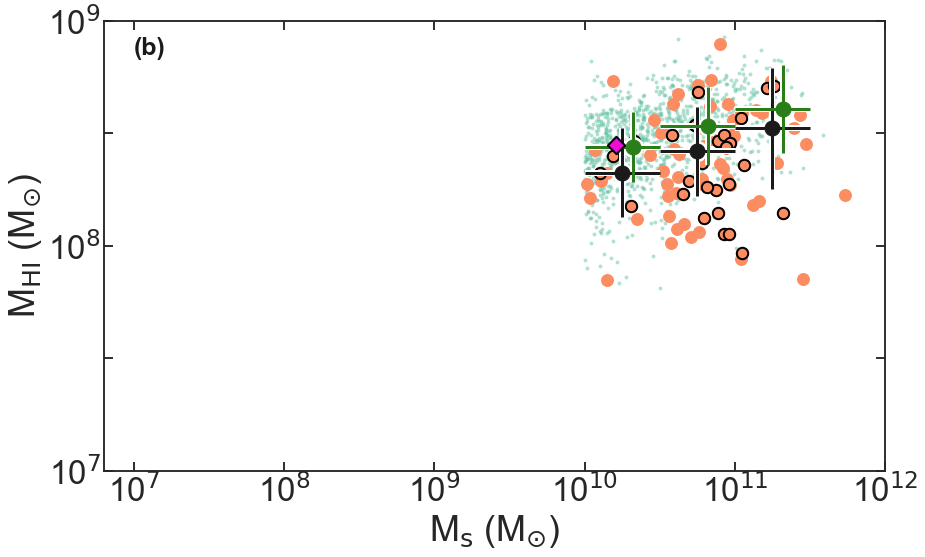

In [8]:
"""
HI VS STELLAR
"""
sns.set_context("talk",font_scale=2.0)
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8})
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(14, 8.27)

myColors = sns.color_palette("Set2", 2)
colors = itertools.cycle(myColors)

y_all = all_data['M_HI'][np.where( (all_data['W3snr'] > 3.) )]
x_all = all_data['LogMs'][np.where( (all_data['W3snr'] > 3.) )]
plt.scatter(x_all, y_all, c = myColors[0], lw = 0,s = 15, 
                 marker = 'o', alpha = 0.5,
                 label = "HI-WISE Sample (Parkash et al. 2018)") 

x = sample['LogMs']
y = sample['M_HI']
plt.scatter(x, y, s = 130, marker = 'o', c = myColors[1],
                 alpha = 1, label='Our Sample') 

x = observed['LogMs']
y = observed['M_HI']
c2 = observed['w2best'] - observed['w3best']
sc = plt.scatter(x, y, lw = 2, edgecolor='black',s = 130, marker = 'o',
                 c = myColors[1], alpha = 1, label='Spectroscopy Data') 

########## Binning the data according to M_s
bins = np.linspace(10, 11.5, 4)
x_med, y_med,x_left, x_right, y_bot, y_top = med(bins,  sample['LogMs'], sample['M_HI'], silent=False)

plt.errorbar(x_med, y_med, yerr = (y_bot, y_top), xerr = (x_left, x_right), color='w',fmt='o', \
             ecolor='w', ms = 20, elinewidth=6, label = "") 
plt.errorbar(x_med, y_med, yerr = (y_bot, y_top), xerr = (x_left, x_right), color='k',fmt='o', \
             ecolor='k', ms = 15, elinewidth=3, **scatter_kwargs,label = "")

shift = 0.07
x_med, y_med,x_left, x_right, y_bot, y_top = med(bins, x_all, y_all, silent=False)
plt.errorbar(x_med+shift, y_med, yerr = (y_bot, y_top), xerr = (x_left+shift, x_right-shift), color='w',fmt='o', \
             ecolor='w', ms = 20, elinewidth=6, label = "") 
plt.errorbar(x_med+shift, y_med, yerr = (y_bot, y_top), xerr = (x_left+shift, x_right-shift), color=sns.xkcd_rgb['tree green'],
             fmt='o', ecolor=sns.xkcd_rgb['tree green'], ms = 15, elinewidth=3, **scatter_kwargs,label = "")

######### GASS 3505
x, y = [10.21], [9.9]
plt.scatter(x, y, s = 150, c = sns.xkcd_rgb['fuchsia'], marker = 'D', lw = 2, edgecolor='black', label = 'GASS 3505', zorder=200)

######### PLOT SETUP
ax.tick_params(axis='x',top='on')
ax.tick_params(axis='y',right='on')
plt.xlabel('M$_{\mathrm{s}}$ (M$_{\odot}$)')
plt.ylabel('M$_{\mathrm{HI}}$ (M$_{\odot}$)')
plt.ylim(7,11)
plt.xlim(6.8,12)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['','10$^{7}$','10$^{8}$','10$^{9}$','10$^{10}$','10$^{11}$', '10$^{12}$']
ax.set_xticklabels(labels)

labels = [item.get_text() for item in ax.get_yticklabels()]
labels = ['10$^{7}$','','10$^{8}$','','10$^{9}$','','10$^{10}$','','10$^{11}$']
ax.set_yticklabels(labels)

plt.text(7,10.7,"(b)",color= 'k', fontsize=25, fontweight = 'bold')
# legend = plt.legend(loc = 4,  frameon=True)
# legend.set_zorder(0)
# frame = legend.get_frame()
# frame.set_edgecolor('k')
# frame.set_lw(1)
plt.savefig('MHI_MS.pdf', bbox_inches='tight')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/Users/vaishalp/anaconda/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off

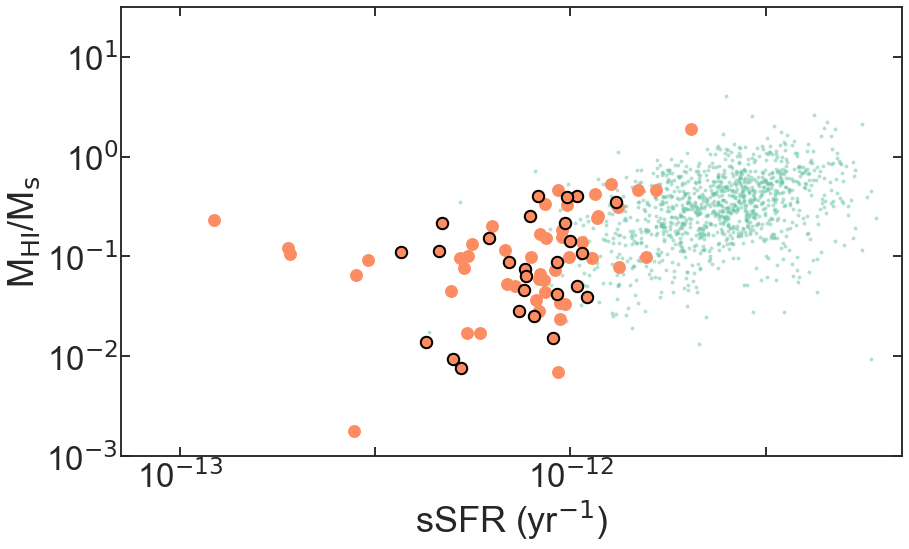

In [9]:
"""
Hi fraction vs sSFR 
"""
sns.set_context("talk",font_scale=2.0)
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8})
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(14, 8.27)

myColors = sns.color_palette("Set2", 2)
colors = itertools.cycle(myColors)

y_all = all_data['M_HI'][np.where( (all_data['W3snr'] > 3.) )] - all_data['LogMs'][np.where( (all_data['W3snr'] > 3.) )]
x_all = all_data['SFR_3'][np.where( (all_data['W3snr'] > 3.) )] - all_data['LogMs'][np.where( (all_data['W3snr'] > 3.) )]
plt.scatter(x_all, y_all, c = myColors[0], lw = 0,s = 15, 
                 marker = 'o', alpha = 0.5,
                 label = "HI-WISE Sample (Parkash et al. 2018)") 

x = sample['SFR_3'] - sample['LogMs']
y = sample['M_HI'] - sample['LogMs']
plt.scatter(x, y, s = 130, marker = 'o', c = myColors[1],
                 alpha = 1, label='Our Sample') 

x = observed['SFR_3'] - observed['LogMs']
y = observed['M_HI'] - observed['LogMs']
sc = plt.scatter(x, y, lw = 2, edgecolor='black',s = 130, marker = 'o',
                 c = myColors[1], alpha = 1, label='Spectroscopy Data') 


######### PLOT SETUP
ax.tick_params(axis='x',top='on')
ax.tick_params(axis='y',right='on')
plt.ylabel('M$_{\mathrm{HI}}$/M$_{\mathrm{s}}$')
plt.xlabel('sSFR (yr$^{-1}$) ')
plt.ylim(-3,1.5)
plt.xlim(-13.3,-9.3)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['','10$^{-13}$','','10$^{-12}$','','10$^{-11}$','','10$^{-10}$','', '']
ax.set_xticklabels(labels)

labels = [item.get_text() for item in ax.get_yticklabels()]
labels = ['10$^{-3}$','10$^{-2}$','10$^{-1}$','10$^{0}$','10$^{1}$', '']
ax.set_yticklabels(labels)

# legend = plt.legend(loc = 2,  frameon=True)
# legend.set_zorder(0)
# frame = legend.get_frame()
# frame.set_edgecolor('k')
# frame.set_lw(1)
plt.savefig('MHIMS_sSFR.pdf', bbox_inches='tight')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/Users/vaishalp/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:688: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/vaishalp/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:688: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/U

10.25 -10.765731568141657 0.6079098087280254 15.0
10.75 -11.083318182314885 0.4034330567309814 56.0
11.25 -11.240211883102285 0.2695515424082109 19.0
10.25 -10.125306371291256 0.29860402385196605 615.0
10.75 -10.383038654755829 0.4149016734135835 442.0
11.25 -10.720503221684961 0.36803822507336376 114.0


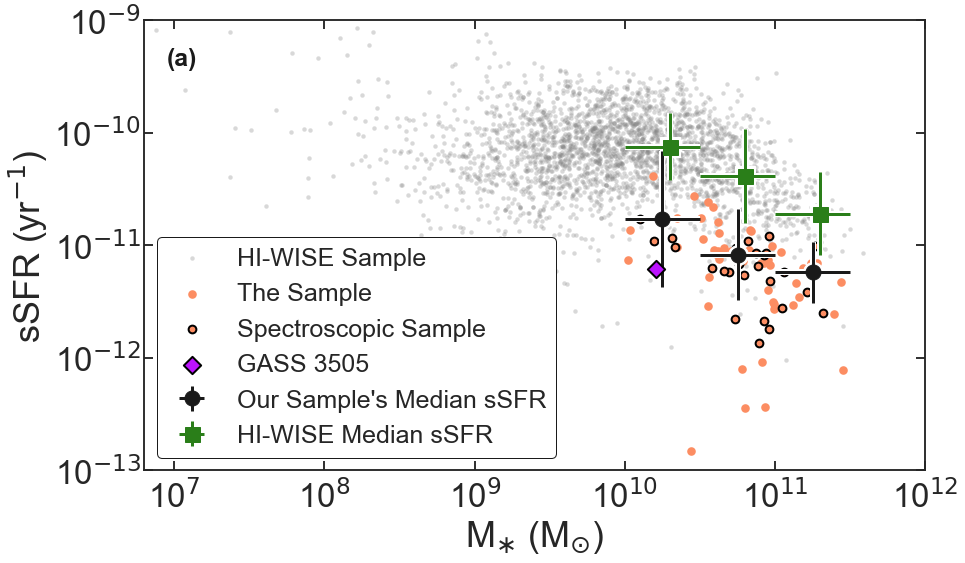

In [24]:
"""
sSFR VS Ms
"""
sns.set_context("talk",font_scale=2.0)
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8})
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(14, 8.27)

myColors = sns.color_palette("Set2", 5)
colors = itertools.cycle(myColors)

x_all = all_data_1['LogMs'][np.where( (all_data_1['W3snr'] > 3.) )]
y_all = all_data_1['SFR_3'][np.where( (all_data_1['W3snr'] > 3.) )] - all_data_1['LogMs'][np.where( (all_data_1['W3snr'] > 3.) )]
plt.scatter(x_all, y_all, c = 'grey', lw = 0,s = 20, 
                 marker = 'o', alpha = 0.3,
                 label = "HI-WISE Sample") 

y = sample['SFR_3'] - sample['LogMs']
x = sample['LogMs']
plt.scatter(x, y, s = 50, marker = 'o', c = myColors[1],
                 alpha = 1, label='The Sample') 

y = observed['SFR_3'] - observed['LogMs']
x = observed['LogMs']
sc = plt.scatter(x, y, lw = 2, edgecolor='black',s = 60, marker = 'o',
                 c = myColors[1], alpha = 1, label='Spectroscopic Sample') 

# x = observed['LogMs'][np.where(observed['HIPASS'] == 'HIPASSJ0330-33')]
# y = observed['SFR_3'][np.where(observed['HIPASS'] == 'HIPASSJ0330-33')] -\
# observed['LogMs'][np.where(observed['HIPASS'] == 'HIPASSJ0330-33')]
# sc = plt.scatter(x, y, lw =2, edgecolor='black',s = 550, marker = '*',
#                  c = myColors[0], alpha = 1, label='HIPASSJ0330-33') 


######### Binning the data according to M_s
bins = np.linspace(10, 11.5, 4)
x_med, y_med,x_left, x_right, y_bot, y_top = med(bins, sample['LogMs'], sample['SFR_3'] - sample['LogMs'], silent=False)

plt.errorbar(x_med, y_med, yerr = (y_bot, y_top), xerr = (x_left, x_right), color='w',fmt='o', \
             ecolor='w', ms = 20, elinewidth=6, label = "") 
plt.errorbar(x_med, y_med, yerr = (y_bot, y_top), xerr = (x_left, x_right), color='k',fmt='o', \
             ecolor='k', ms = 15, elinewidth=3, **scatter_kwargs,label = "Our Sample's Median sSFR")

shift = 0.05
x_med, y_med,x_left, x_right, y_bot, y_top = med(bins, all_data['LogMs'],all_data['SFR_3'] - all_data['LogMs'], silent=False)
plt.errorbar(x_med+shift, y_med, yerr = (y_bot, y_top), xerr = (x_left+shift, x_right-shift), color='w',fmt='s', \
             ecolor='w', ms = 20, elinewidth=6, label = "") 
plt.errorbar(x_med+shift, y_med, yerr = (y_bot, y_top), xerr = (x_left+shift, x_right-shift), color=sns.xkcd_rgb['tree green'],
             fmt='s', ecolor=sns.xkcd_rgb['tree green'], ms = 15, elinewidth=3, **scatter_kwargs,label = "HI-WISE Median sSFR")

######### GASS 3505
x, y = [10.21], [-11.21]
plt.scatter(x, y, s = 150, c = sns.xkcd_rgb['neon purple'], marker = 'D', lw = 2, edgecolor='black', label = 'GASS 3505', zorder=200)

######### PLOT SETUP
ax.tick_params(axis='x',top='on', pad = 10)
ax.tick_params(axis='y',right='on')
plt.xlabel(r'M$_{\mathrm{\ast}}$ (M$_{\odot}$)')
plt.ylabel('sSFR (yr$^{-1}$) ')
plt.xlim(6.8,12)
plt.ylim(-13,-9.)

labels = [item.get_text() for item in ax.get_yticklabels()]
labels = ['10$^{-13}$','10$^{-12}$','10$^{-11}$','10$^{-10}$','10$^{-9}$']
ax.set_yticklabels(labels)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['','10$^{7}$','10$^{8}$','10$^{9}$','10$^{10}$','10$^{11}$', '10$^{12}$']
ax.set_xticklabels(labels)

plt.text(6.95,-9.4,"(a)",color= 'k', fontsize=25, fontweight = 'bold')
legend = plt.legend(loc = 3,  frameon=True, prop={'size': 25}, 
                    ncol = 1, columnspacing=0.1, framealpha = 1)
legend.set_zorder(20)
frame = legend.get_frame()
frame.set_edgecolor('k')
frame.set_lw(1)

plt.scatter([7.12],[-11.1], c = 'grey', lw = 0,s = 30, marker = 'o') 
plt.savefig('sSFR_Ms.pdf', bbox_inches='tight')